In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv(r"C:\Users\mahe\Downloads\train_E6oV3lV.csv")
test = pd.read_csv(r"C:\Users\mahe\Downloads\test_tweets_anuFYb8.csv")

In [2]:
train.apply(lambda x: sum(x.isnull()))

id       0
label    0
tweet    0
dtype: int64

<h2>Data Distribution</h2>

In [10]:
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [12]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

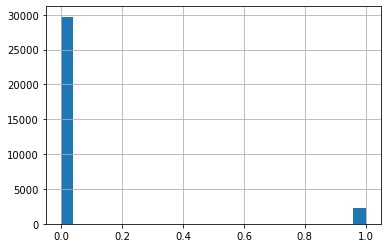

In [13]:
train['label'].hist(bins=25)

In [16]:
cnt0=len(train[train['label']==0])
cnt1=len(train[train['label']==1])
pcnt0 = cnt0/(cnt1+cnt0)
print('Percent 0:',round(pcnt0*100,2))
pcnt1 = cnt1/(cnt1+cnt0)

print('Percent 1:',round(pcnt1*100,2))

Percent 0: 92.99
Percent 1: 7.01


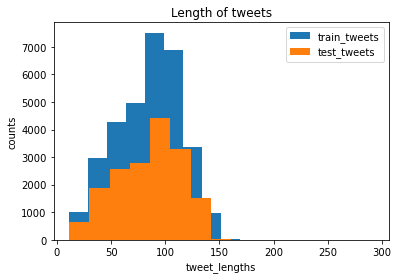

In [24]:
import matplotlib.pyplot as plt
trainlen=train['tweet'].str.len()
testlen = test['tweet'].str.len()
plt.hist(trainlen,label='train_tweets',bins=15)
plt.hist(testlen,label='test_tweets',bins=15)
plt.title('Length of tweets')
plt.xlabel('tweet_lengths')
plt.ylabel('counts')
plt.legend()
plt.show()

In [19]:
def word_count(sentence):
    return len(sentence.split())
train['word_count']=train['tweet'].apply(word_count)

In [20]:
train.head(5)

,id,label,tweet,source,word_count
0,1,0,@user when a father is dysfunctional and is s...,train,18
1,2,0,@user @user thanks for #lyft credit i can't us...,train,19
2,3,0,bihday your majesty,train,3
3,4,0,#model i love u take with u all the time in ...,train,14
4,5,0,factsguide: society now #motivation,train,4


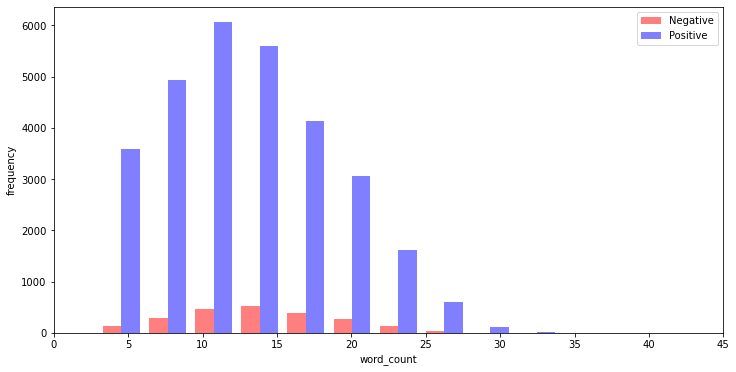

In [21]:
x=train['word_count'][train.label==1]
y=train['word_count'][train.label==0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word_count')
plt.ylabel('frequency')
g=plt.hist([x,y],color=['r','b'],alpha=0.5,label=['Negative','Positive'])
plt.legend(loc='upper right')

In [22]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter

c:\users\mahe\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [28]:
all_words = []
for line in list(train['tweet']):
    words=line.split()
    for word in words:
        all_words.append(word.lower())
Counter(all_words).most_common(10)

[('@user', 17291),
 ('the', 10065),
 ('to', 9768),
 ('a', 6261),
 ('i', 5655),
 ('you', 4949),
 ('and', 4831),
 ('in', 4570),
 ('for', 4435),
 ('of', 4152)]

In [3]:
combi = train.append(test, ignore_index=True, sort=True)

In [5]:
import re
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [6]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [7]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [8]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [9]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(5)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [10]:
combi['tidy_tweet'].head(5)

0    when father dysfunctional selfish drags kids i...
1    thanks #lyft credit cause they offer wheelchai...
2                                  bihday your majesty
3                           #model love take with time
4                       factsguide society #motivation
Name: tidy_tweet, dtype: object

In [11]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [12]:
tokenized_tweet.head(5)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [13]:
combi['tidy_tweet'] = tokenized_tweet

In [14]:
combi['tidy_tweet'].head(5)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [15]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [16]:
all_words = ' '.join([text for text in combi['tidy_tweet']])

In [17]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])

In [19]:
def hashtag_extract(x):
    hashtag= []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtag.append(ht)
    return hashtag

In [20]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

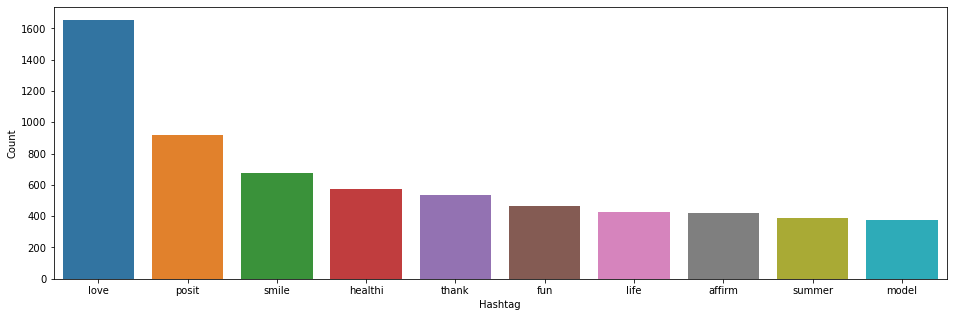

In [25]:
import seaborn as sns
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

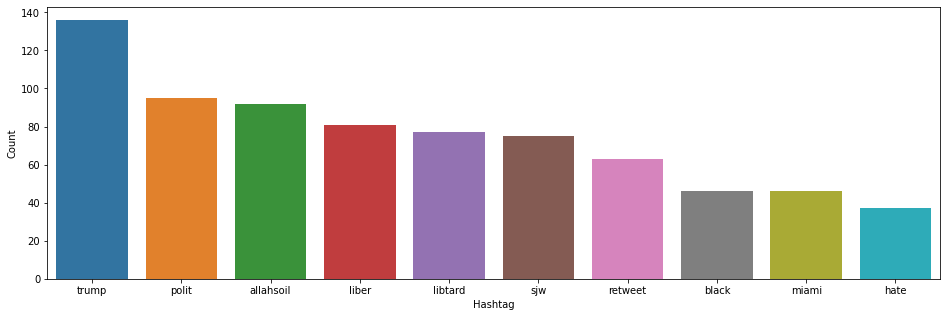

In [26]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.5303408146300915

In [111]:
test.shape

(17197, 3)

In [31]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

In [32]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5451327433628319